# Overview

This week's curriculum is a little bit of a mixed bag. We'll cover 3 topics that are not super-related, but all are _very useful_ (and there is some connection between them). The overview is

* Tricks for raw text (chapter 3)
* Finding the important words in a document (TF-IDF)
* Sentiment analysis.

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. Finally, we'll jump to _sentiment analysis_. A topic which is pretty useless when it comes to wikipedia (because all wikipedia text is designed to be neutral), but which is highly useful elsewhere as we shall see (and since the course is all about teaching you stuff that's useful for the project and the rest of your lives, I'll get into it here. 

# Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP1e is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

> _Reading_: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you _know that Chapter 3 of this book exists_, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

> _Exercise_: Just a couple of examples from the book: Work through the exercises NLPP1e 3.12: 6, 30\.
> 

In [ ]:
#access raw text from web
from urllib import urlopen
url = "http://www.gutenberg.org/files/2554/2554.txt"
raw = urlopen(url).read()
type(raw)

# Words that characterize the branches

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something very interesting about humans that produce text. Then, in the exercise (which is the main work you'll do today), we'll use a very simple weighting scheme called TF-IDF to find the important words within each branch of philosophy (according to wikipedia). In cleaning the wiki pages, we'll use some of the stuff you've just read about above. Finally, we'll even visualize them in a fun little word cloud (below is what I found for metaphysics).

![Metaphysics](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/List_of_metaphysicians.png)

 _Exercises_: TF-IDF and the branches of philosophy.
> 
> Setup. We want to start from a clean version of the philosopher pages with as little wiki-markup as possible. 
> We needed it earlier to get the links, etc, but now we want a readable version. We can get a fairly nice version directly
> from the wikipedia API, simply call `prop=extracts&exlimit=max&explaintext` instead of `prop=revisions` as we did earlier.
> This will make the API return the text without links and other markup. 
> 
> * Use this method to retrive a nice copy of all philosopher's text. You can, of course, also clean the existing pages using
> regular expressions, if you like (but that's probably more work).
> 
> The exercise.
> 
> * First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?
> * Since we want to find out which words are important for each _branch_, so we're going to create six large documents, one per branch of philosophy. Tokenize the pages, and combine the tokens into one long list per branch. Remember the bullets below for success.
>   * If you dont' know what _tokenization_ means, go back and read Chapter 3 again. This advice is valid for every cleaning step below.
>   * Exclude philosopher names (since we're interested in the words, not the names).
>   * Exclude punctuation.
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * Note that none of the above has to be perfect. It might not be easy to remove _all_ philosopher names. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some pages are very detailed and repeat certain words again and again and again, whereas other pages are very short. For that reason, I decided to use the unique set of words from each page rather than each word in proportion to how it's actually used on that page. Choices like that are up to you.
> * Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within each branch. 
>   * Describe similarities and differences between the branches.
>   * Why aren't the TFs not necessarily a good description of the branches?
> * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> * We're ready to calculate TF-IDF. Do that for each branch. 
>   * List the 10 top words for each branch.
>   * Are these 10 words more descriptive of the branch? If yes, what is it about IDF that makes the words more informative?
> * Normally, TF-IDF is used for single documents. What does TF-IDF tell us about the content of a single document in a collection.
> 


In [4]:
import urllib
import urllib2
import io,os
import re
from __future__ import print_function 
#open files
aes_file = io.open('aestheticians.txt','r',encoding='utf-8')
epi_file = io.open('epistemologists.txt','r',encoding='utf-8')
eth_file = io.open('ethicists.txt','r',encoding='utf-8')
log_file = io.open('logicians.txt','r',encoding='utf-8')
met_file = io.open('metaphysicians.txt','r',encoding='utf-8')
sap_file = io.open('social and political philosophers.txt','r',encoding='utf-8')

#aes_phys = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-()]+)([\w\s\.|-,]*)(\]\])', aes_file.read(),re.UNICODE)
#epi_phys = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-()]+)([\w\s\.|-,]*)(\]\])', epi_file.read(),re.UNICODE)
#eth_phys = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-()]+)([\w\s\.|-,]*)(\]\])', eth_file.read(),re.UNICODE)
#log_phys = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-()]+)([\w\s\.|-,]*)(\]\])', log_file.read(),re.UNICODE) #log
#met_phys = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-()]+)([\w\s\.|-,]*)(\]\])', met_file.read(),re.UNICODE) #met
#sap_phys = re.findall(r'\*\s*([\w\.\s]*)(\[*)([\w\s\.-()]+)([\w\s\.|-,]*)(\]\])', sap_file.read(),re.UNICODE)
#sap_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(.+?)\]\]', sap_file.read(),re.UNICODE)
aes_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', aes_file.read(),re.UNICODE)
epi_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', epi_file.read(),re.UNICODE)
eth_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', eth_file.read(),re.UNICODE)
log_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', log_file.read(),re.UNICODE) #log
met_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', met_file.read(),re.UNICODE) #met
sap_phys = re.findall(r'(\*\s?|\*\s?St\.\s?)(\[\[)(\:nl\:)*(.+?)\]\]', sap_file.read(),re.UNICODE)


comb_aes_list=[]
comb_epi_list=[]
comb_eth_list=[]
comb_log_list=[]
comb_met_list=[]
comb_sap_list=[]
#print len(aes_phys)
for aes_phy in aes_phys:  #print each phyloer of the list 
    aes_phy=aes_phy[3].split('|')[0]
    comb_aes_list.append(aes_phy)
for epi_phy in epi_phys:  #print each phyloer of the list 
    epi_phy=epi_phy[3].split('|')[0]
    comb_epi_list.append(epi_phy)
for eth_phy in eth_phys:  #print each phyloer of the list 
    if re.match(r'List of.*', eth_phy[3], re.IGNORECASE):
        continue
    eth_phy=eth_phy[3].split('|')[0]
    comb_eth_list.append(eth_phy)
for log_phy in log_phys:  #print each phyloer of the list 
    log_phy=log_phy[3].split('|')[0]
    comb_log_list.append(log_phy)
for met_phy in met_phys:  #print each phyloer of the list 
    met_phy=met_phy[3].split('|')[0]
    comb_met_list.append(met_phy)
for sap_phy in sap_phys:  #print each phyloer of the list 
    if re.match(r'List of.*', sap_phy[3], re.IGNORECASE):
        continue
    sap_phy=sap_phy[3].split('|')[0]
    comb_sap_list.append(sap_phy)
comb_list=set(comb_aes_list+comb_epi_list + comb_met_list + comb_eth_list + comb_log_list + comb_sap_list)
branches={"aes":comb_aes_list,"epi":comb_epi_list,"eth":comb_eth_list,"log":comb_log_list,"met":comb_met_list,"sap":comb_sap_list}

    

In [51]:

#retrieve phys from each branch
baseurl="https://en.wikipedia.org/w/api.php?"
action="action=query"
content="prop=extracts&exlimit=max&explaintext"
dataformat="format=json"
for branch, phy_list in branches.items():
    os.makedirs('philosophers/'+branch)
    for phy in phy_list:
        titles = "titles="+urllib.quote(phy.encode('utf-8'))
        query = "%s&%s&%s&%s&%s" % (baseurl,action,titles,content,dataformat)
        page=urllib2.urlopen(query).read()
        with open('philosophers/'+branch+'/'+phy+'.json','wb') as output:
            output.write(page)
            

In [91]:
import nltk,sys
import json
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np 


tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+')
stops = set(nltk.corpus.stopwords.words('english'))
st=LancasterStemmer() #lancaster stemmer
pt=PorterStemmer() #porter stemmer
wn=WordNetLemmatizer() #wordnet lemmatizer
branchs_dic={}
branchs_fdist={}
name_set=set()

for fullname in comb_list:
    [name_set.add(name.lower()) for name in fullname.split()]

def tokenize(page_text):
    branch_tokens = tokenizer.tokenize(page_text)
    
    branch_tokens= [wn.lemmatize(word) for word in branch_tokens if word.lower() not in stops and word.lower().isalpha() and word.lower() not in name_set and len(word)>2]
    return branch_tokens  


#generate TFs logic
tfidf = TfidfVectorizer(tokenizer=tokenize)
phys_top10_dic={}
for branch, phy_list in branches.items():
    
    json_path=u'philosophers/'+branch+'/'
    json_files = [pos_json for pos_json in os.listdir(json_path)] #read all json files in that dir

    branch_tokens=[]
    phys_dic={}

    for phy in json_files:
        path=json_path+phy
        json_page=json.loads(open(path, 'r').read())
        page_key=json_page['query']['pages'].keys()[0]
        page_name=json_page['query']['pages'][page_key]['title'] #phy name
        
        if 'extract' in json_page['query']['pages'][page_key].keys(): #if extract key exist
            page_text=json_page['query']['pages'][page_key]['extract']
            phys_dic[phy]=page_text.replace('\n', ' ').encode('utf-8')
    #print (name_set)     
    phy_tfs = tfidf.fit_transform(phys_dic.values())
    feature_names = tfidf.get_feature_names()
    #for col in phy_tfs.nonzero()[1]:
    #    print (feature_names[col], ' - ', phy_tfs[0, col])
        
    feature_array = np.array(feature_names)
    tfidf_sorting = np.argsort(phy_tfs.toarray()).flatten()[::-1]

    n = 10
    top_n = feature_array[tfidf_sorting][:n]
    print (branch, top_n)
    phys_top10_dic[branch]=top_n




#
#    branch_fdist=nltk.FreqDist(branch_tokens)
    #for word, frequency in branch_fdist.most_common(10):
    #    print(u'{};{}'.format(word, frequency))
#    fdists[branch]=branch_fdist.most_common(10)
#    break
#print(len(fdists))
          

aes [u'art' u'moyen' u'lyon' u'gothique' u'lautrec' u'callot' u'occident' u'de'
 u'beau' u'medieval']
log [u'ukasiewicz' u'polish' u'notation' u'logic' u'warsaw' u'poland'
 u'propositional' u'university' u'oclc' u'valued']
met [u'amherst' u'uma' u'gifford' u'specie' u'special' u'practical' u'woodrow'
 u'relentless' u'imputes' u'brannon']
epi [u'cassette' u'photosynthesis' u'sound' u'audio' u'psychedelic' u'mushroom'
 u'video' u'psilocybin' u'novelty' u'psychedelics']
eth [u'vat' u'brain' u'hand' u'know' u'utopia' u'tracking' u'anarchy' u'theory'
 u'isbn' u'one']
sap [u'therese' u'geneva' u'contract' u'discourse' u'french' u'diderot'
 u'confession' u'walpole' u'letter' u'emile']



### The word cloud. 

The most difficult thing about the word cloud exercise is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c https://conda.anaconda.org/amueller wordcloud
 
If you can't get that to work, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. Use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

_Exercises (word-cloud edition)_
 
> * The package needs a string to work on. The way that I converted my TF-IDF results to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its TF-IDF score (rounded up to the nearest integer value). 
> * Now, create word-cloud for each branch of philosophy. Feel free to make it as fancy or non-fancy as you like. Comment on the results.
> 

In [ ]:
for branch, top_n in phys_top10_dic:
    

# Sentiment Analysis

Sentiment analysis is another highly useful technique. It doesn't tie in strongly with our work on Wikipedia (more on that in the video), but we'll go through it here because experience shows that sentiment analysis might well be very useful when you get to the project stage of the class.

> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.

> Exercise, sentiment over some books from NLPP1e
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc). The function should complain if there are no words with sentiment attached.
> * Calculate a sentiment profile for the novels in NLPP1e chapter 1\. The sentiment profile has sentiment on the _y_-axis and position in the text on the _x_-axis. Use a [moving average](https://en.wikipedia.org/wiki/Moving_average) to show how the sentiment changes. Create profiles for sliding windows of length 15 words, 50 words, 100 words, 500 words.
> * Comment on the sentiment profiles. Do they show a similar pattern? What is the effect of changing the size of the sliding window?
>

In [93]:
import requests
r = requests.get(
    'http://journals.plos.org/plosone/article/asset?unique&id=info:doi/10.1371/journal.pone.0026752.s001')

In [96]:
# read into pandas dataframe, skip the header
import pandas as pd
import cStringIO
wordlist = pd.read_csv(cStringIO.StringIO(r.text), sep="\t", skiprows=[0, 1])

print (wordlist[0:5])

        word  happiness_rank  happiness_average  happiness_standard_deviation  \
0   laughter               1               8.50                        0.9313   
1  happiness               2               8.44                        0.9723   
2       love               3               8.42                        1.1082   
3      happy               4               8.30                        0.9949   
4    laughed               5               8.26                        1.1572   

  twitter_rank google_rank nyt_rank lyrics_rank  
0         3600          --       --        1728  
1         1853        2458       --        1230  
2           25         317      328          23  
3           65        1372     1313         375  
4         3334        3542       --        2332  


In [108]:
# calculates a sentiment on given text and wordlist with happiness averages
def calc_sentiment(tokens, happiness_words):
    w_sum = 0
    w_total = 0
    # convert tokenlist
    cleaned_tokens = [wn.lemmatize(w.lower()) for w in tokens if len(w) > 2 and w.isalpha() and w not in stops]
    for word in cleaned_tokens:
        if word in happiness_words:
            w_total += 1
            avg = happiness_words[word]
            # check for valid number
            if isinstance(avg, np.float64): 
                w_sum += avg
    if w_total > 0:
        sentiment_val = w_sum / w_total 
    else:
        # uncomment to see the complaints
        #print 'There are no words with sentiment attached.'
        sentiment_val = 0
    return sentiment_val 

In [110]:
happiness_dic = pd.Series(wordlist.happiness_average.values, index=wordlist.word).to_dict()

In [101]:
import nltk
nltk.data.path.append('D:\\1st Semester Master\\Social Graphs and interaction\\lesson7\\nltk')


In [102]:
from nltk.book import *

novels = [text1, text2, text3, text4, text5, text6, text7, text8, text9]
for t in novels:
    print ("book",t)

book <Text: Moby Dick by Herman Melville 1851>
book <Text: Sense and Sensibility by Jane Austen 1811>
book <Text: The Book of Genesis>
book <Text: Inaugural Address Corpus>
book <Text: Chat Corpus>
book <Text: Monty Python and the Holy Grail>
book <Text: Wall Street Journal>
book <Text: Personals Corpus>
book <Text: The Man Who Was Thursday by G . K . Chesterton 1908>


In [112]:
from collections import OrderedDict

# create the sentiment profile
def moving_avg(size, token_book):
    start = 0
    sent_pfile = dict()
    while start < len(token_book):
        # sliding window of the book with constant window size
        token_window = token_book[start:start+size]
        # compute happiness average
        sentiment = calc_sentiment(token_window, happiness_dic)
        # save sentiment value according to position in text in dict
        window_pos = start + (size/2)
        if sentiment > 0:
            sent_pfile.update({window_pos:sentiment})
        start += size
    # sort the hippiness value
    sent_pfil_sorted = OrderedDict(sorted(sent_pfile.items(), key=lambda kv: kv[0], reverse=False))
    return sent_pfil_sorted

In [113]:
#plot happiness value across the entire book
def plot_sentiment(sent_dict):
    x = sent_dict.keys()
    y = sent_dict.values()
    plt.plot(x, y)
    plt.show()

Novel: Moby Dick by Herman Melville 1851
Window length: 15


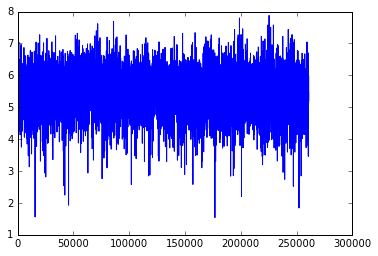

Novel: Moby Dick by Herman Melville 1851
Window length: 50


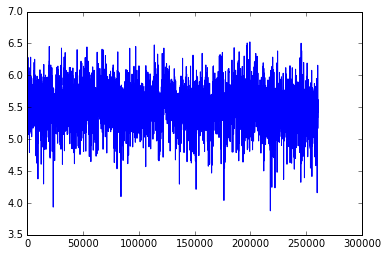

Novel: Moby Dick by Herman Melville 1851
Window length: 100


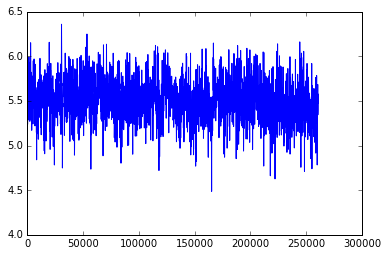

Novel: Moby Dick by Herman Melville 1851
Window length: 500


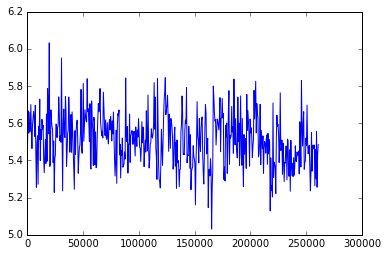

Novel: Sense and Sensibility by Jane Austen 1811
Window length: 15


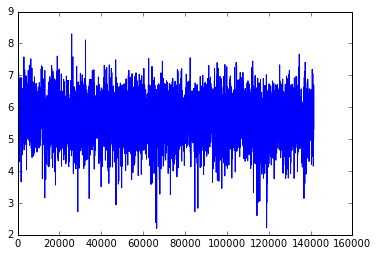

Novel: Sense and Sensibility by Jane Austen 1811
Window length: 50


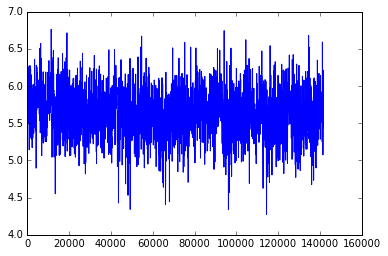

Novel: Sense and Sensibility by Jane Austen 1811
Window length: 100


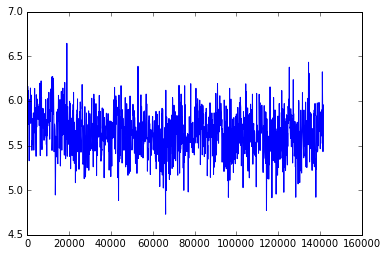

Novel: Sense and Sensibility by Jane Austen 1811
Window length: 500


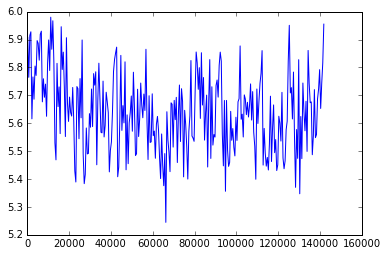

Novel: The Book of Genesis
Window length: 15


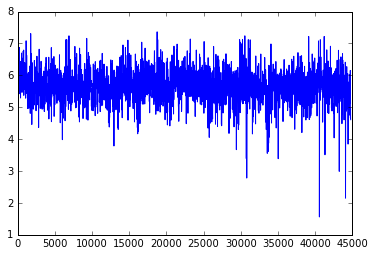

Novel: The Book of Genesis
Window length: 50


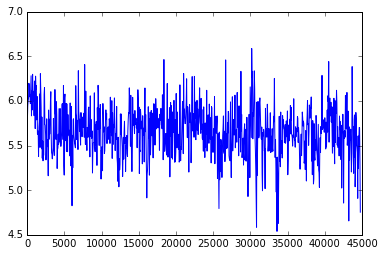

Novel: The Book of Genesis
Window length: 100


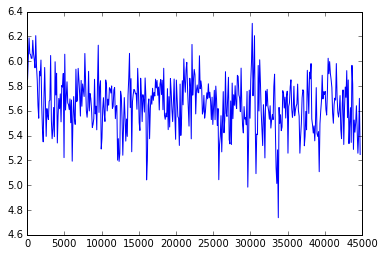

Novel: The Book of Genesis
Window length: 500


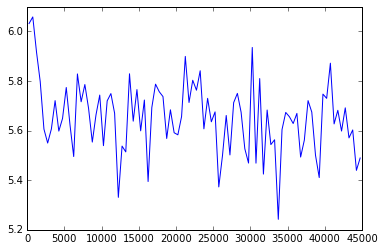

Novel: Inaugural Address Corpus
Window length: 15


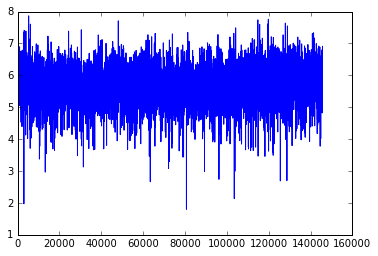

Novel: Inaugural Address Corpus
Window length: 50


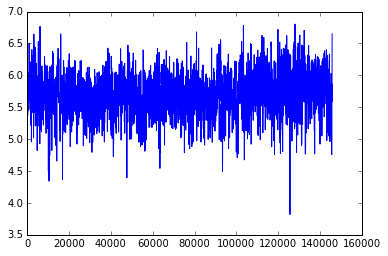

Novel: Inaugural Address Corpus
Window length: 100


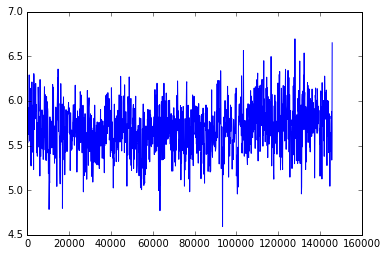

Novel: Inaugural Address Corpus
Window length: 500


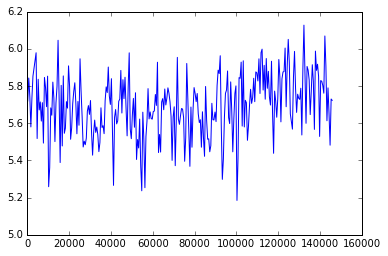

Novel: Chat Corpus
Window length: 15


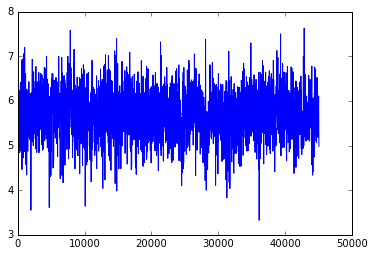

Novel: Chat Corpus
Window length: 50


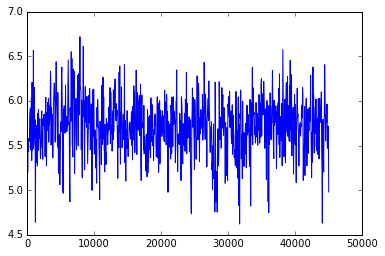

Novel: Chat Corpus
Window length: 100


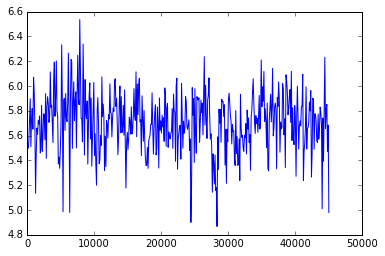

Novel: Chat Corpus
Window length: 500


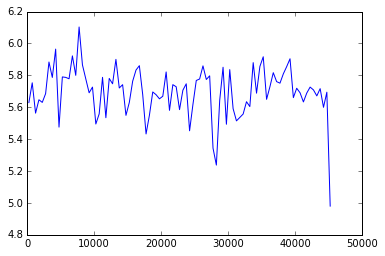

Novel: Monty Python and the Holy Grail
Window length: 15


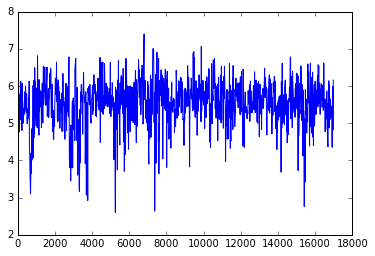

Novel: Monty Python and the Holy Grail
Window length: 50


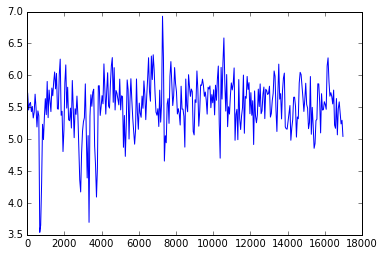

Novel: Monty Python and the Holy Grail
Window length: 100


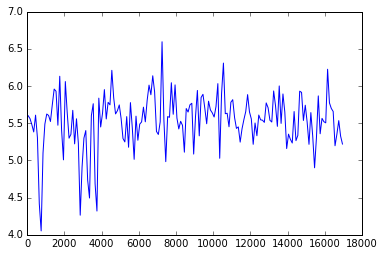

Novel: Monty Python and the Holy Grail
Window length: 500


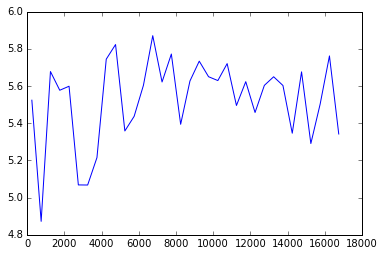

Novel: Wall Street Journal
Window length: 15


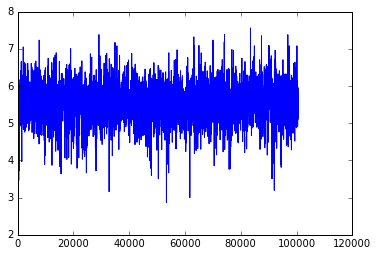

Novel: Wall Street Journal
Window length: 50


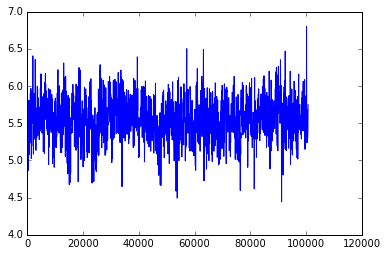

Novel: Wall Street Journal
Window length: 100


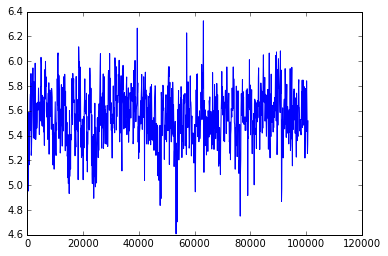

Novel: Wall Street Journal
Window length: 500


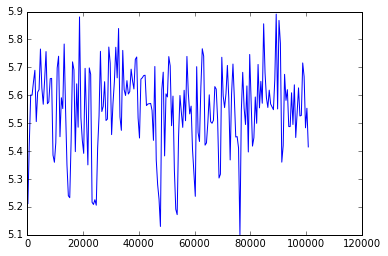

Novel: Personals Corpus
Window length: 15


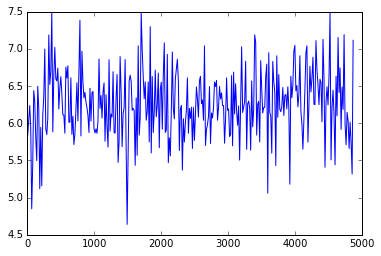

Novel: Personals Corpus
Window length: 50


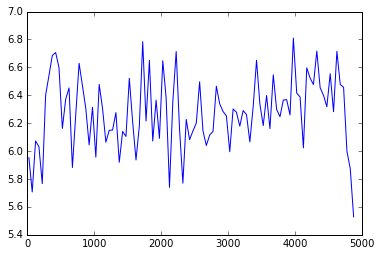

Novel: Personals Corpus
Window length: 100


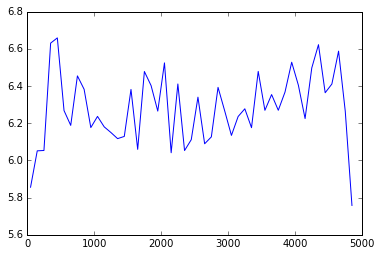

Novel: Personals Corpus
Window length: 500


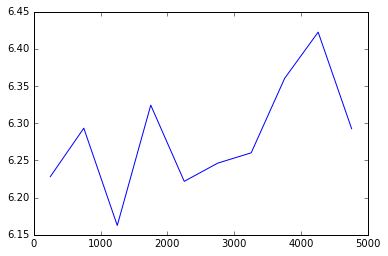

Novel: The Man Who Was Thursday by G . K . Chesterton 1908
Window length: 15


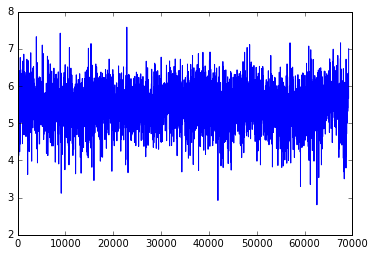

Novel: The Man Who Was Thursday by G . K . Chesterton 1908
Window length: 50


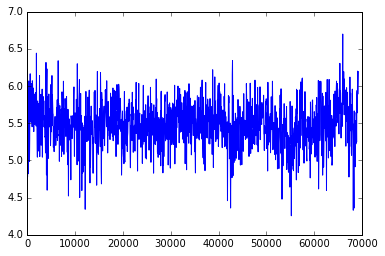

Novel: The Man Who Was Thursday by G . K . Chesterton 1908
Window length: 100


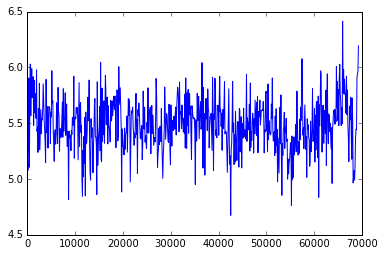

Novel: The Man Who Was Thursday by G . K . Chesterton 1908
Window length: 500


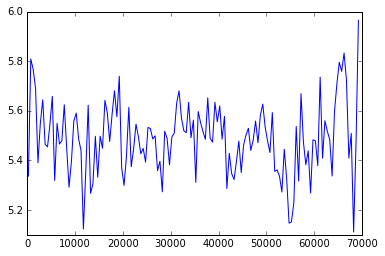

In [115]:
%matplotlib inline
sliding_windows = [15, 50, 100, 500]

# dicts containing plot values
text_sentiment = dict()
# create plot for each book and windows size
for t in novels:
    for window_size in sliding_windows:
        text_sentiment["novel_{}-window_{}".format(t.name, window_size)] = moving_avg(window_size, t)
        print ("Novel:", t.name)
        print ("Window length:", window_size)
        plot_sentiment(text_sentiment["novel_{}-window_{}".format(t.name, window_size)])